## Installing the package

In [0]:
!pip install tfp-causalimpact

In [0]:
import causalimpact

## Creating an example dataset

In [0]:
from IPython.display import HTML

import pandas as pd
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions

In [0]:
DATA_SEED = (0, 1)
NOISE_SEED = (1, 2)

rv = tfp.sts.AutoregressiveMovingAverageStateSpaceModel(
    num_timesteps=100,
    ar_coefficients=[0.999],
    ma_coefficients=[],
    level_scale=1., 
    initial_state_prior=tfd.MultivariateNormalDiag([0.], [1.])
)

x1 = (100. + rv.sample(seed=DATA_SEED))[..., 0]
y = 1.2 * x1 + tfd.Normal(0., 1.).sample(100, seed=NOISE_SEED)

y = tf.where(tf.range(0, y.shape[0]) <= 71, y, y + 10.)

data = pd.DataFrame(data={'y': y, 'x1': x1},
                    index=pd.date_range('2021-06-14', '2021-9-21'))

data.head()

,y,x1
2021-06-14,118.798439,98.545265
2021-06-15,120.166534,99.965958
2021-06-16,120.969421,100.746544
2021-06-17,123.130760,102.570267
2021-06-18,122.162979,102.887138


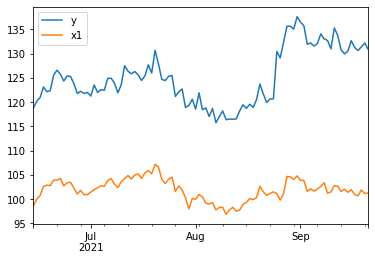

In [0]:
data.plot.line();

## Running an analysis

In [0]:
pre_period = (data.index[0], data.index[70])
post_period = (data.index[71], data.index[-1])

In [0]:
%%time 
impact = causalimpact.fit_causalimpact(
    data=data,
    pre_period=pre_period,
    post_period=post_period)

CPU times: user 5.19 s, sys: 454 ms, total: 5.64 s
Wall time: 4.92 s


## Plotting the results

In [0]:
# note that just `causalimpact.plot(impact)` usually works, but this is extra 
# portable
HTML(causalimpact.plot(impact).to_html())

## Printing a summary table


In [0]:
print(causalimpact.summary(impact, output_format='summary'))


Posterior Inference {CausalImpact}
                          Average            Cumulative
Actual                    132.3              3837.4
Prediction (s.d.)         122.6 (0.32)       3555.2 (9.24)
95% CI                    [122.0, 123.2]     [3537.6, 3573.8]

Absolute effect (s.d.)    9.7 (0.32)         282.1 (9.24)
95% CI                    [9.1, 10.3]        [263.5, 299.8]

Relative effect (s.d.)    7.9% (0.3%)        7.9% (0.0%)
95% CI                    [7.4%, 8.5%]       [7.4%, 8.5%]

Posterior tail-area probability p: 0.001
Posterior prob. of a causal effect: 99.89%

For more details run the command: summary(impact, output_format="report")


There is also a verbose implementation:

In [0]:
print(causalimpact.summary(impact, output_format='report'));


Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 132.3. By contrast, in the absence of an
intervention, we would have expected an average response of 122.6.
The 95% interval of this counterfactual prediction is [122.0, 123.2].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is 9.7 with a 95% interval of
[9.1, 10.3]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 3837.4.
By contrast, had the intervention not taken place, we would have expected
a sum of 3555.2. The 95% interval of this prediction is [3537.6, 3573.8].


The above results are given in terms of absolute numbers. In relative
terms, the response variable s

## Working with dates and times

The API allows the pre_period and post_period to be specified in a few different formats:

In [0]:
# Using elements from the index
pre_period = (data.index[0], data.index[70])
post_period = (data.index[71], data.index[-1])

In [0]:
# Using integers into the index. If your index is not a datetime index, this 
# may be the only way!
pre_period = (0, 70)
post_period = (71, 99)

In [0]:
# Using strings. These have to match index elements after 
# calling `pd.to_datetime`
pre_period = ('2021-06-14', '2021-08-23')
post_period = ('2021-08-24', '2021-09-21')